# Реализация перцептрона

**Перцептрон** - простейшая нейронная сеть, основанная на следующем принципе:
Сеть состоит из трёх слоёв нейронов:
1. *Входной слой* - "сенсоры" сети, именно они получают изначальные данные, они "смотрят" на наш датасет.
2. *Внутренний(скрытый) слой(слои)* - нейроны внутреннего слоя передают обработанные *активационной функцией* данные от входного слоя, между собой, а затем в выходной слой
3. *Выходной слой* - после взаимодействия с сетью данные выводятся, как решение сети. На основе данного аутпута делается вывод, насколько сеть успешно справилась с поставленной задачей.
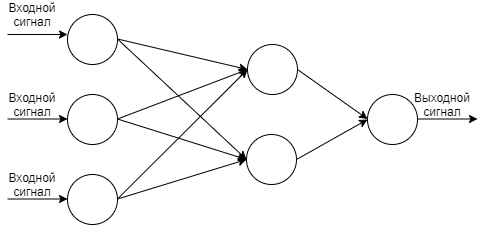

Все нейроны между собой одинаковы. Всё, что они делают, передают полученные входные сигналы обработанные одним и тем же алгоритмом - **активационной функцией**. При одинаковом входном сигнале, нейрон выдает одинаковое значение. В таком случае, их все можно было бы заменить одним нейроном. Во избежание подобной проблемы, каждый нейрон имеет **вес**.

**Вес** нейрона отвечает за важность передаваемого ему значения.

**Обучение нейронной сети** - процесс подбора оптимальных весов, при которых сеть выдает значение, максимально
приближенное к ожидаемому.

**Обучение с учителем(guided learning)** - процесс обучения, в котором мы используем на вход сети данные, для которых мы знаем результат. При сравнении полученного результата с ожидаемым значением, мы вычисляем отклонение или ошибку, а затем исправляем веса нейронов таким образом, чтобы это отклонение уменьшалось, и повторяем этот процесс многократно, вплоть до достижения необходимого результата. Чем разнообразнее датасет, тем эффективнее обучение.

## Активационная функция сети - сигмоид

$f(x) = \frac{1}{1 + e^-x}$

**Активационная функция** - алгоритм просчёта значения, передаваемого *нейроном* дальше по цепочке, на основании *входных данных*. 

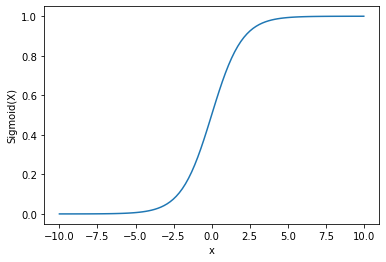

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.ioff()

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

**Сигмоид** - функция, по оси x от минус бесконечности до бесконечности, по оси y в пределах значений **(0, 1)**. В точке х = 0, имеет значение **0.5**.

Таким образом, получив сумму значений входных данных, нейрон будет выдавать выходное значение на промежутке от 0 до 1. Такая активационная функция хорошо подходит для принятия бинарных решений. Примем, что Sigmoid(x) > 0.5 = ИСТИНА, иначе - ЛОЖЬ

**Пример:**


Допустим, у нас есть три входных нейрона со значениями ИСТИНА, ЛОЖЬ и ИСТИНА, два нейрона в скрытом слое и один выходной нейрон, который будет выдавать результирующее значение по окончании работы сети.
Так как сеть ещё не обучена, мы вибираем случайное значение весов на входах от -0.5 до 0.5.

Таким образом, сумма входных значений первого нейрона скрытого слоя будет равна:

In [72]:
1*0.43 + 0*0.18 + 1*-0.21

0.22

Передав значение в функцию, мы получим:

In [95]:
import numpy as np

# Рассчёт выходного значения, путём применения активационной функции
def sigmoid(x):
    return 1/(1 + np.exp(-x))

round(sigmoid(0.22), 2)

0.55

Выходное значение:
$sigmoid(0,22) = \frac{1}{(1 + e^-0,22)} = 0,55$

Повторив операцию со вторым нейроном получим:

In [99]:
# Сумма входных значений

1*0.11 + 0*0.27 + 1*0.31

0.42

In [94]:
import numpy as np

# Рассчёт выходного значения, путём применения активационной функции
def sigmoid(x):
    return 1/(1 + np.exp(-x))

round(sigmoid(0.42), 2)

0.6

Выходное значение: 
$sigmoid(0,42) = \frac{1}{(1 + e^-0,42)} = 0,60$

Повторим операции для выходного нейрона:

Входные значения 0.55 > 0.5 = ИСТИНА & 0.60 > 0.5 = ИСТИНА

In [104]:
# Сумма входных значений

1*0.22 + 1*0.42

0.64

In [102]:
import numpy as np

# Рассчёт выходного значения, путём применения активационной функции
def sigmoid(x):
    return 1/(1 + np.exp(-x))

round(sigmoid(0.64), 2)

0.65

**Результат:**

$sigmoid(0,64) = \frac{1}{(1 + e^-0,64)} = 0,65$

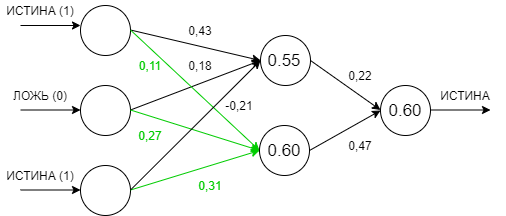
___
# TODO: check this out
*Есть расхождения с изображением автора материала, сумма входных значений второго нейрона $1*0.11 + 0*0.27 + 1*0.31 = 0.42$, а не $0.47$, следовательно выходной нейрон получает на вход $1*0.22 + 1*0.42 = 0.64$, а не $0.60$

Рассчитаем ошибку выхода сети, путём получения разницы между ожидаемым значением и выходом(предположим, что ожидавемое значение **0**):

In [80]:
0.65 - 0

0.65

#### Для того, чтобы расчитать насколько нужно изменить вес нейрона, необходимо величину ошибки умножить на производную активационной функции в этой точке:

$sigmoid(x)dx = sigmoid(x)(1 - sigmoid(x))$

In [90]:
round(0.65 * (1 - 0.65), 2)

0.23